kalo multiclass biasanya pake softmax <br>
kalo multilabel itu keluarnannya beda2 sendiri (sigmoid)

<img src="https://cdn.discordapp.com/attachments/859449355248074783/993140914249814036/unknown.png">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [5]:
df = pd.read_csv("data/iris.csv", index_col="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

visualisasi data

In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

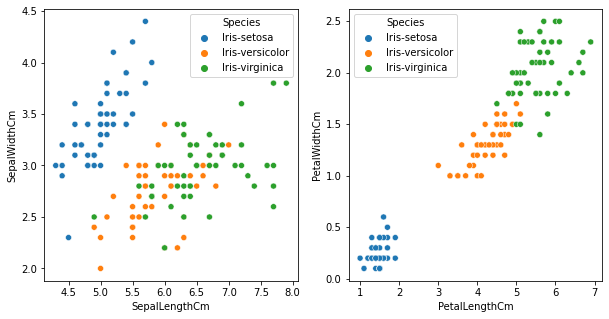

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df)
plt.subplot(122)
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df)

In [14]:
X = df.drop(columns=["Species"])
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [16]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns),
])

from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42, multi_class='ovr'))
])

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 1000.0, 'algo__fit_intercept': False}
0.9583333333333334 0.9500000000000001 0.9666666666666667


In [19]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="standard", transform="yeo-johnson"), X_train.columns),
])

from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42, multi_class='ovr'))
])

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

c:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\jcopml\pipeline\_pipeline.py:65: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 10.0, 'algo__fit_intercept': True}
0.9666666666666667 0.9333333333333332 0.9333333333333333


In [17]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns),
])

from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42, multi_class='multinomial'))
])

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 10.0, 'algo__fit_intercept': True}
0.975 0.9666666666666667 1.0


In [20]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="standard", transform="yeo-johnson"), X_train.columns),
])

from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42, multi_class='multinomial'))
])

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

c:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\jcopml\pipeline\_pipeline.py:65: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 10.0, 'algo__fit_intercept': True}
0.975 0.9583333333333334 1.0
